In [128]:
import pandas as pd
import numpy as np
df_athletes = pd.read_csv("Data/athletesMenGames2019.csv",sep=';',na_values = ['--']);
df_athletes.drop(['CountryCode','RegionalName','RegionName','RegionCode','RegionalCode','Rn5k'],axis=1,inplace=True);

In [129]:
df_athletes[df_athletes['Height_cm']<150]

,CompetitorId,CompetitorName,FirstName,LastName,Gender,Age,RegionId,Profession,Height_cm,Weight_kg,...,CleanAndJerk_kg,Snatch_kg,DeadLift_kg,FightGoneBad,MaxPullUps,Fran,Grace,Helen,Filthy50,Sprint400m
28,191624,Alvaro Lopez,Alvaro,Lopez,M,33,0,0,8.54,83.91452,...,151.95332,115.66596,233.59988,NaN,65.0,2:01,1:39,NaN,NaN,NaN
29,270266,Omar Martinez,Omar,Martinez,M,27,0,0,3.54,76.20345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,849478,Shingo Moromasa,Shingo,Moromasa,M,32,0,0,7.54,83.91452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df_athletes.loc[df_athletes['CompetitorId']==191624,'Height_cm'] = 170.18;
df_athletes.loc[df_athletes['CompetitorId']==849478,'Height_cm'] = 175;
df_athletes.loc[df_athletes['CompetitorId']==270266,'Height_cm'] = np.nan;
df_athletes['Height_cm'].fillna(df_athletes['Height_cm'].mean(),inplace=True);

In [131]:
feat_drop = ['Gender','RegionId','Profession','AffiliateId','DivisionId','CountryOfOriginCode']
df_strength = df_athletes.drop(feat_drop,axis=1);
df_strength['Weight_kg'].describe()

count    144.000000
mean      84.774455
std        6.729722
min       63.502880
25%       81.646560
50%       86.182480
75%       88.450440
max       98.883060
Name: Weight_kg, dtype: float64

In [172]:
def strengthMeanByMovement(df,movement):
    df_movement = df[df[movement].notnull()].reset_index();
    min = int(round(df_movement['Weight_kg'].min()))
    max = int(round(df_movement['Weight_kg'].max()))
    df_movement['Weight_range'] = pd.cut(df_movement.Weight_kg,range(min-1,max+2,6), include_lowest=True)
    df_movement = df_movement[['Weight_range',movement]]
    df_movement = round(df_movement.groupby('Weight_range').mean())
    return df_movement

In [173]:
df_BackSquat = strengthMeanByMovement(df_strength,'BackSquat_kg')
df_BackSquat

,BackSquat_kg
Weight_range,
"(62.999, 69.0]",137.0
"(69.0, 75.0]",156.0
"(75.0, 81.0]",185.0
"(81.0, 87.0]",198.0
"(87.0, 93.0]",199.0
"(93.0, 99.0]",196.0


In [174]:
df_CleanAndJerk = strengthMeanByMovement(df_strength,'CleanAndJerk_kg')
df_CleanAndJerk

,CleanAndJerk_kg
Weight_range,
"(62.999, 69.0]",105.0
"(69.0, 75.0]",118.0
"(75.0, 81.0]",136.0
"(81.0, 87.0]",145.0
"(87.0, 93.0]",154.0
"(93.0, 99.0]",158.0


In [175]:
df_Snatch = strengthMeanByMovement(df_strength,'Snatch_kg')
df_Snatch

,Snatch_kg
Weight_range,
"(62.999, 69.0]",80.0
"(69.0, 75.0]",101.0
"(75.0, 81.0]",112.0
"(81.0, 87.0]",116.0
"(87.0, 93.0]",125.0
"(93.0, 99.0]",125.0


In [176]:
df_DeadLift = strengthMeanByMovement(df_strength,'DeadLift_kg')
df_DeadLift

,DeadLift_kg
Weight_range,
"(62.999, 69.0]",162.0
"(69.0, 75.0]",186.0
"(75.0, 81.0]",217.0
"(81.0, 87.0]",226.0
"(87.0, 93.0]",236.0
"(93.0, 99.0]",234.0


In [138]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

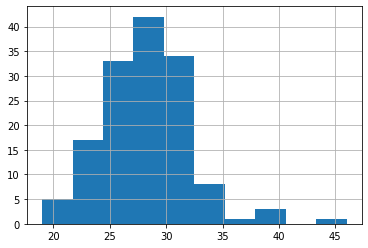

In [179]:
df_athletes['Age'].hist();

In [186]:
print('Men athletes in CrossFit Games 2019:')
print('Mean values for strength marks selected by body weight range')
df_meanByStrength = pd.concat([df_BackSquat, df_CleanAndJerk,df_Snatch,df_DeadLift],axis=1)
df_meanByStrength

Men athletes in CrossFit Games 2019:
Mean values for strength marks selected by body weight range


,BackSquat_kg,CleanAndJerk_kg,Snatch_kg,DeadLift_kg
Weight_range,,,,
"(62.999, 69.0]",137.0,105.0,80.0,162.0
"(69.0, 75.0]",156.0,118.0,101.0,186.0
"(75.0, 81.0]",185.0,136.0,112.0,217.0
"(81.0, 87.0]",198.0,145.0,116.0,226.0
"(87.0, 93.0]",199.0,154.0,125.0,236.0
"(93.0, 99.0]",196.0,158.0,125.0,234.0
